In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# The CSV file at the specified file_path is read into a DataFrame df using pd.read_csv().
file_path = r'C:/Users/Angel/Downloads/Python-A3 Individual Assignment Brief/Pizza Sales Dataset.csv' #https://www.kaggle.com/datasets/rhonarosecortez/pizza-sales-dataset
df = pd.read_csv(file_path)
    
# Displaying the first 5 rows to check the data
print("First 5 rows of the DataFrame:","\n")
print(df.head())

First 5 rows of the DataFrame: 

   pizza_id  order_id  pizza_name_id  quantity order_date order_day  \
0         1         1     hawaiian_m         1   1/1/2015  Thursday   
1         2         2  classic_dlx_m         1   1/1/2015  Thursday   
2         3         2  five_cheese_l         1   1/1/2015  Thursday   
3         4         2    ital_supr_l         1   1/1/2015  Thursday   
4         5         2     mexicana_m         1   1/1/2015  Thursday   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, 

In [3]:
# Display missing values
print(df.dtypes)
missing_values = df.isnull().sum()
print("Missing_values:\n", missing_values)

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_day             object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object
Missing_values:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_day            0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [4]:
# Convert 'order_date' to datetime and extract only the date (yyyy-mm-dd format)
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=False)

# Display the data type for each field to verify changes
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_day                    object
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [5]:
# Extract the month from order_date
df['month'] = df['order_date'].dt.month

print(df.head())

   pizza_id  order_id  pizza_name_id  quantity order_date order_day  \
0         1         1     hawaiian_m         1 2015-01-01  Thursday   
1         2         2  classic_dlx_m         1 2015-01-01  Thursday   
2         3         2  five_cheese_l         1 2015-01-01  Thursday   
3         4         2    ital_supr_l         1 2015-01-01  Thursday   
4         5         2     mexicana_m         1 2015-01-01  Thursday   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2 

In [6]:
# Convert 'order_time' to datetime and extract only the time
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# Display the data type for each field to verify changes
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_day                    object
order_time           datetime64[ns]
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
month                         int32
dtype: object

In [7]:
# Extract the hour from order_time
df['hour'] = df['order_time'].dt.hour

print(df.head())

   pizza_id  order_id  pizza_name_id  quantity order_date order_day  \
0         1         1     hawaiian_m         1 2015-01-01  Thursday   
1         2         2  classic_dlx_m         1 2015-01-01  Thursday   
2         3         2  five_cheese_l         1 2015-01-01  Thursday   
3         4         2    ital_supr_l         1 2015-01-01  Thursday   
4         5         2     mexicana_m         1 2015-01-01  Thursday   

           order_time  unit_price  total_price pizza_size pizza_category  \
0 1900-01-01 11:38:36       13.25        13.25          M        Classic   
1 1900-01-01 11:57:40       16.00        16.00          M        Classic   
2 1900-01-01 11:57:40       18.50        18.50          L         Veggie   
3 1900-01-01 11:57:40       20.75        20.75          L        Supreme   
4 1900-01-01 11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  P

In [8]:
# Count the number of ingredients in each row
df['ingredient_count'] = df['pizza_ingredients'].dropna().str.split(', ').apply(len)

# Display the updated DataFrame with the ingredient count
df[['pizza_name', 'pizza_ingredients', 'ingredient_count']].head()

,pizza_name,pizza_ingredients,ingredient_count
0,The Hawaiian Pizza,"Sliced Ham, Pineapple, Mozzarella Cheese",3
1,The Classic Deluxe Pizza,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",5
2,The Five Cheese Pizza,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",6
3,The Italian Supreme Pizza,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",6
4,The Mexicana Pizza,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",8


In [9]:
# Calculate sales for each row
df['sales'] = df['quantity'] * df['unit_price']

# Group by 'month' and sum the sales
total_monthly_sales = df.groupby('month', as_index=False)['sales'].sum()

# Display the grouped DataFrame
print(total_monthly_sales)

    month     sales
0       1  69793.30
1       2  65159.60
2       3  70397.10
3       4  68736.80
4       5  71402.75
5       6  68230.20
6       7  72557.90
7       8  68278.25
8       9  64180.05
9      10  64027.60
10     11  70395.35
11     12  64701.15


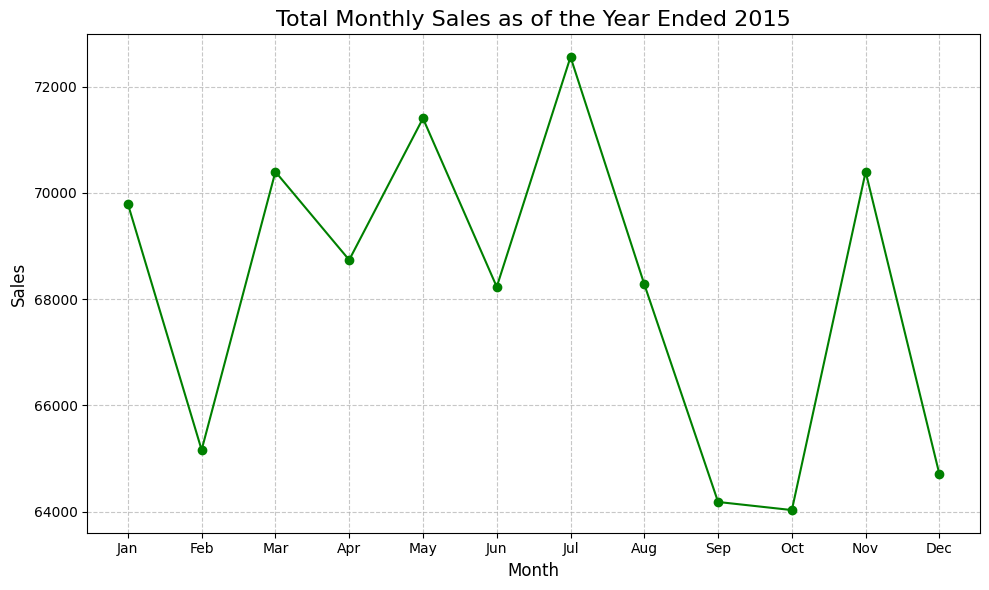

In [10]:
# Sort the DataFrame by month for proper ordering
total_monthly_sales = total_monthly_sales.sort_values('month')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(
    total_monthly_sales['month'], 
    total_monthly_sales['sales'], 
    marker='o', linestyle='-', color='green'
)

# Add labels, title, and grid
plt.title('Total Monthly Sales as of the Year Ended 2015', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])  # Use abbreviated month names
plt.grid(True, linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  # Adjust layout to fit all elements neatly
plt.show()

In [11]:
# Calculate sales for each row
df['sales'] = df['quantity'] * df['unit_price']

# Group by 'day' and average the sales
avg_daily_sales = df.groupby(['order_day'], as_index=False)['sales'].mean()

# Display the grouped DataFrame
print(avg_daily_sales)

   order_day      sales
0     Friday  16.786812
1     Monday  16.851868
2   Saturday  16.748117
3     Sunday  16.765844
4   Thursday  16.868565
5    Tuesday  16.901199
6  Wednesday  16.832191


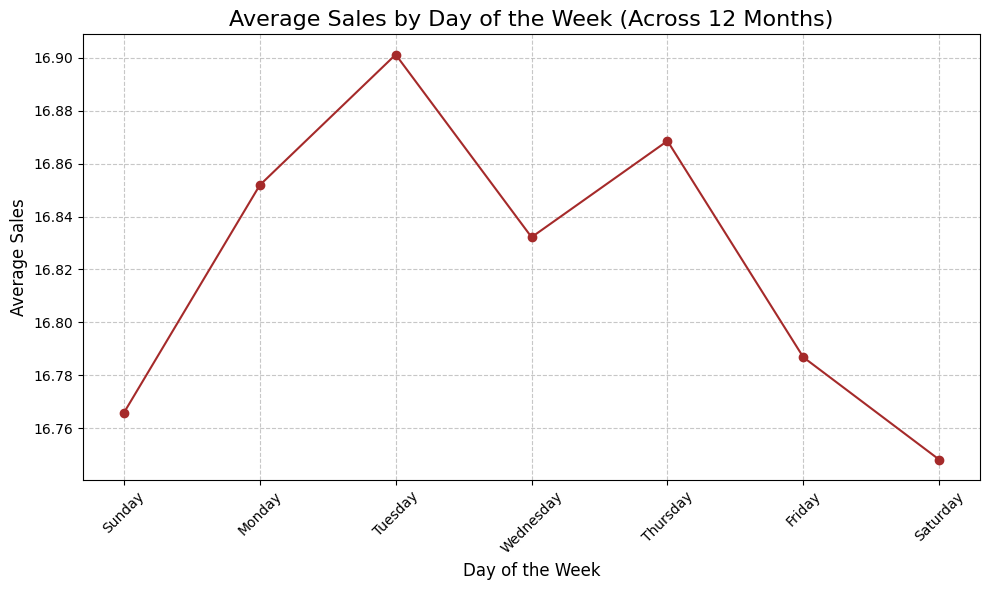

In [12]:
# Define the correct order for days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'order_day' to a categorical type with the specified order
avg_daily_sales['order_day'] = pd.Categorical(avg_daily_sales['order_day'], categories=day_order, ordered=True)

# Sort the DataFrame by the custom order
avg_daily_sales = avg_daily_sales.sort_values('order_day')

# Ensure 'avg_daily_sales' is the DataFrame with average daily sales
plt.figure(figsize=(10, 6))

# Plot the average daily sales
plt.plot(avg_daily_sales['order_day'], avg_daily_sales['sales'], marker='o', linestyle='-', color='brown')

# Add labels, title, and grid
plt.title('Average Sales by Day of the Week (Across 12 Months)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(ticks=range(len(avg_daily_sales['order_day'])), labels=avg_daily_sales['order_day'].unique(), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [13]:
# Calculate sales for each row
df['sales'] = df['quantity'] * df['unit_price']

# Group by 'hour' and average the sales
avg_hourly_sales = df.groupby('hour', as_index=False)['sales'].mean()

# Display the grouped DataFrame
print(avg_hourly_sales)

    hour      sales
0      9  20.750000
1     10  17.861765
2     11  16.817290
3     12  17.098869
4     13  17.099097
5     14  16.813803
6     15  16.716814
7     16  16.739642
8     17  16.767927
9     18  16.662969
10    19  16.696299
11    20  16.694981
12    21  16.625712
13    22  16.653394
14    23  16.490441


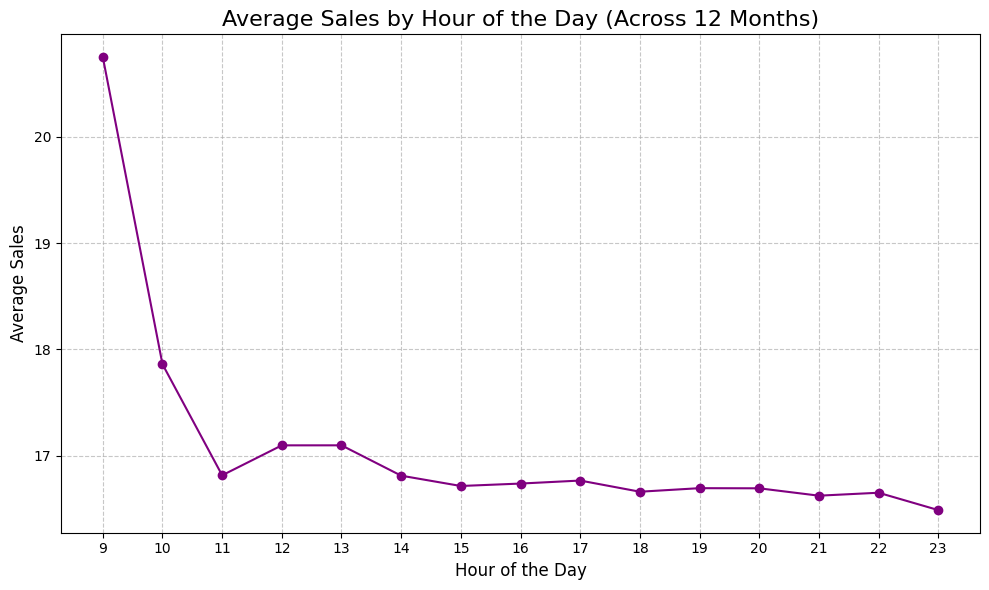

In [14]:
# Ensure 'avg_hourly_sales' is the DataFrame with hourly sales data
plt.figure(figsize=(10, 6))

# Plot the average hourly sales
plt.plot(avg_hourly_sales['hour'], avg_hourly_sales['sales'], marker='o', linestyle='-', color='purple')

# Add labels, title, and grid
plt.title('Average Sales by Hour of the Day (Across 12 Months)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(ticks=avg_hourly_sales['hour'], labels=avg_hourly_sales['hour'], rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  # Adjust layout for better display
plt.show()


In [15]:
# Calculate sales for each row
df['sales'] = df['quantity'] * df['unit_price']

# Group by 'pizza_name' and sum the sales
total_sales_per_pizza = df.groupby('pizza_name', as_index=False)['sales'].sum()

# Sort the result by 'sales' in descending order
total_sales_per_pizza = total_sales_per_pizza.sort_values(by='sales', ascending=False).reset_index(drop=True)

# Display the grouped DataFrame
print(total_sales_per_pizza)

                                    pizza_name     sales
0                       The Thai Chicken Pizza  43434.25
1                   The Barbecue Chicken Pizza  42768.00
2                 The California Chicken Pizza  41409.50
3                     The Classic Deluxe Pizza  38180.50
4                      The Spicy Italian Pizza  34831.25
5                  The Southwest Chicken Pizza  34705.75
6                    The Italian Supreme Pizza  33476.75
7                           The Hawaiian Pizza  32273.25
8                        The Four Cheese Pizza  32265.70
9                           The Sicilian Pizza  30940.50
10                         The Pepperoni Pizza  30161.75
11                             The Greek Pizza  28454.10
12                          The Mexicana Pizza  26780.75
13                       The Five Cheese Pizza  26066.50
14                     The Pepper Salami Pizza  25529.00
15                 The Italian Capocollo Pizza  25094.00
16           The Vegetables + V

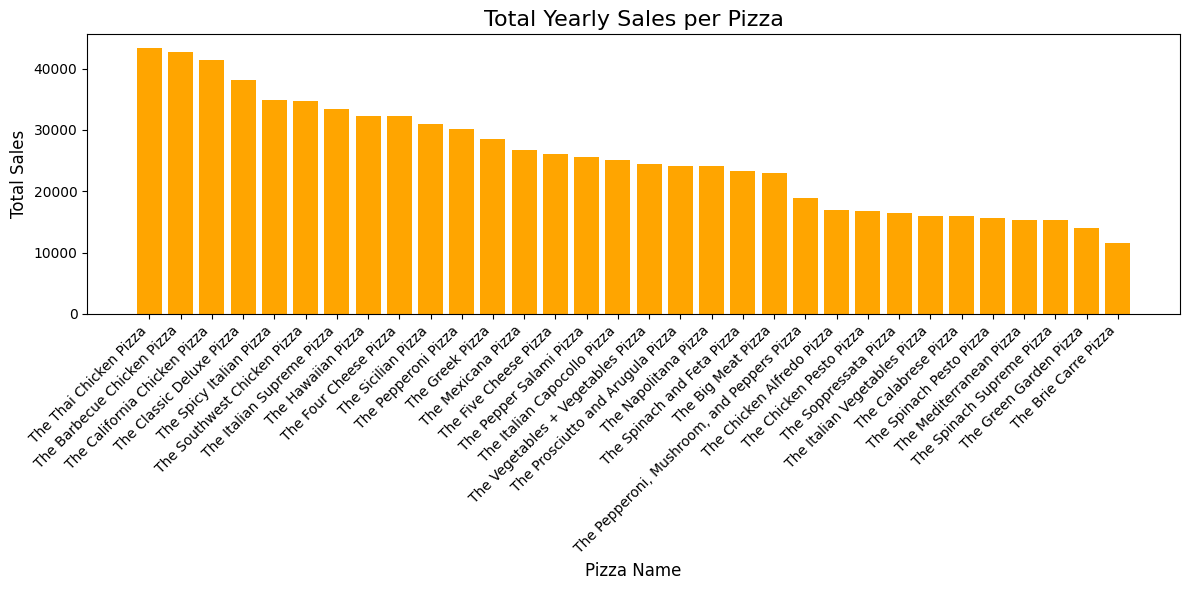

In [16]:
# Sort the data for better visualization (optional)
total_sales_per_pizza = total_sales_per_pizza.sort_values(by='sales', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(total_sales_per_pizza['pizza_name'], total_sales_per_pizza['sales'], color='orange')

# Add labels and title
plt.title('Total Yearly Sales per Pizza', fontsize=16)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate pizza names for better readability

# Show the chart
plt.tight_layout()
plt.show()

In [17]:
# Calculate sales for each row
df['sales'] = df['quantity'] * df['unit_price']

# Group by 'pizza_name' and sum the sales
total_sales_per_category = df.groupby('pizza_category', as_index=False)['sales'].sum()

# Display the grouped DataFrame
print(total_sales_per_category)

  pizza_category      sales
0        Chicken  195919.50
1        Classic  220053.10
2        Supreme  208197.00
3         Veggie  193690.45


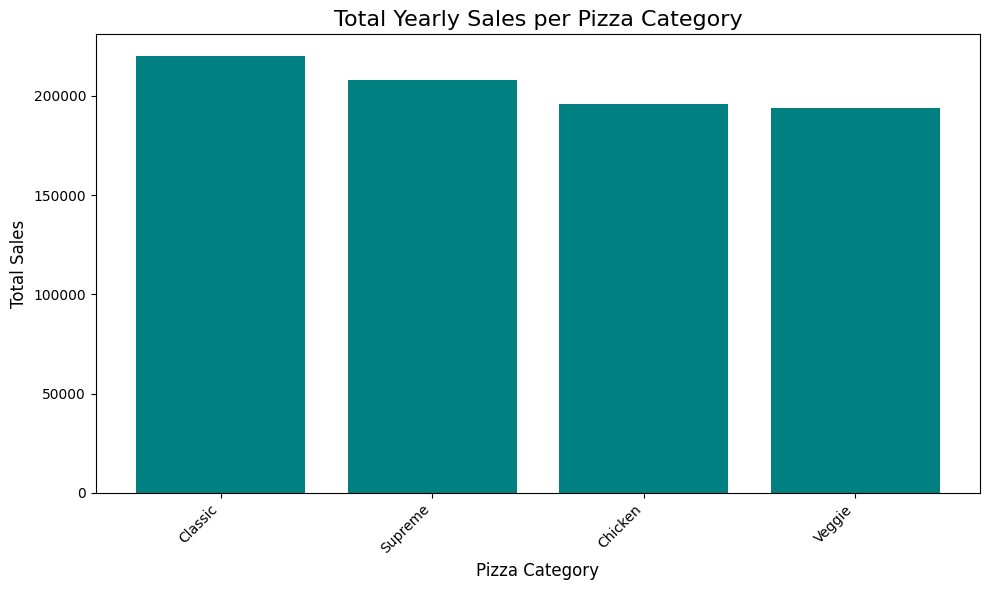

In [18]:
# Sort the data for better visualization (optional)
total_sales_per_category = total_sales_per_category.sort_values(by='sales', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_category['pizza_category'], total_sales_per_category['sales'], color='teal')

# Add labels and title
plt.title('Total Yearly Sales per Pizza Category', fontsize=16)
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate category names for readability

# Show the chart
plt.tight_layout()
plt.show()

In [19]:
# Calculate sales for each row
df['sales'] = df['quantity'] * df['unit_price']

# Group by 'pizza_name' and sum the sales
total_sales_per_size = df.groupby('pizza_size', as_index=False)['sales'].sum()

# Display the grouped DataFrame
print(total_sales_per_size)

  pizza_size      sales
0          L  375318.70
1          M  249382.25
2          S  178076.50
3         XL   14076.00
4        XXL    1006.60


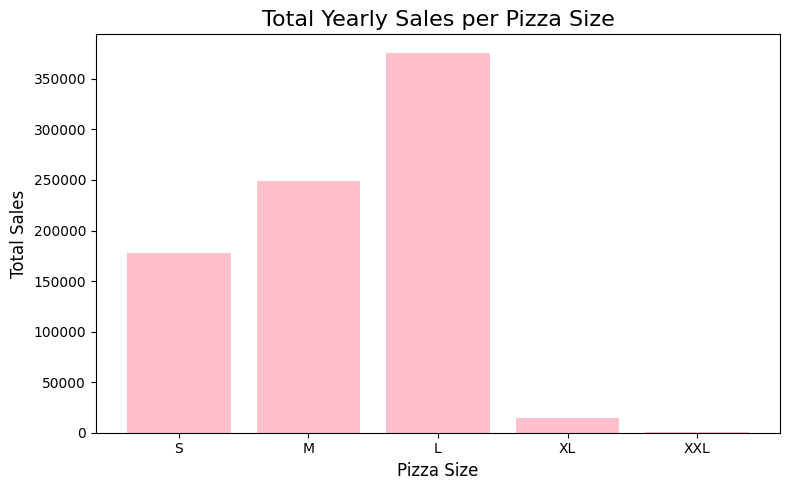

In [20]:
# Define the correct order for pizza sizes
size_order = ['S', 'M', 'L', 'XL', 'XXL']

# Convert 'pizza_size' to a categorical type with the specified order
total_sales_per_size['pizza_size'] = pd.Categorical(
    total_sales_per_size['pizza_size'], categories=size_order, ordered=True
)

# Sort the DataFrame by the custom order
total_sales_per_size = total_sales_per_size.sort_values('pizza_size')

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(total_sales_per_size['pizza_size'], total_sales_per_size['sales'], color='pink')

# Add labels and title
plt.title('Total Yearly Sales per Pizza Size', fontsize=16)
plt.xlabel('Pizza Size', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)  # No rotation needed for size labels

# Show the chart
plt.tight_layout()
plt.show()


In [21]:
# Group by 'order_id' and calculate the total quantity and sum of total_price
result = df.groupby('order_id').agg(
    total_quantity=('quantity', 'sum'),
    total_bill=('total_price', 'sum')
).reset_index()

# Sort the result by 'total_bill' in descending order
result = result.sort_values(by='total_bill', ascending=False).reset_index(drop=True)

# Display the result
print(result)

       order_id  total_quantity  total_bill
0         18845              28      444.20
1         10760              25      417.15
2          1096              15      285.15
3          6169              15      284.00
4           740              15      280.95
...         ...             ...         ...
21345     17455               1        9.75
21346     17456               1        9.75
21347     20492               1        9.75
21348     20284               1        9.75
21349     15300               1        9.75

[21350 rows x 3 columns]


In [22]:
#SUMMARY_STATISTICS
summary_stats = df[['unit_price', 'total_price','ingredient_count']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
         unit_price   total_price  ingredient_count
count  48620.000000  48620.000000      48620.000000
mean      16.494132     16.821474          5.503414
std        3.621789      4.437398          1.559151
min        9.750000      9.750000          2.000000
25%       12.750000     12.750000          5.000000
50%       16.500000     16.500000          6.000000
75%       20.250000     20.500000          6.000000
max       35.950000     83.000000          8.000000


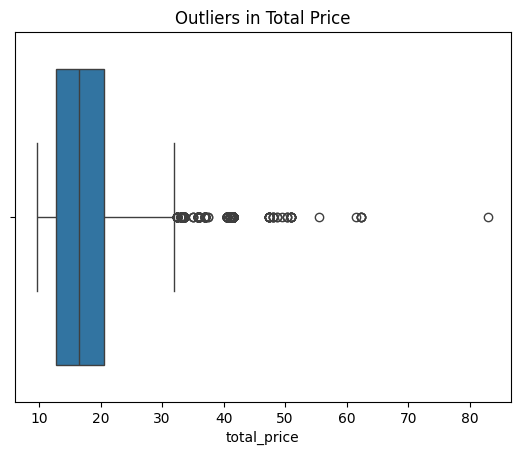

In [23]:
column = 'total_price'

# Calculate Q1, Q3, and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers

# Boxplot to visualize outliers in 'total_price'
sns.boxplot(x=df['total_price'])
plt.title('Outliers in Total Price')
plt.show()

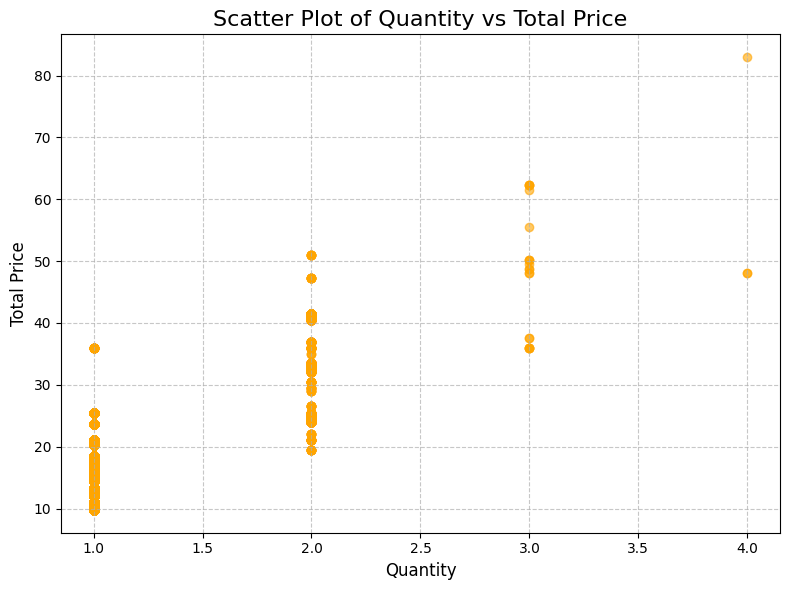

In [24]:
# Scatter plot for 'quantity' vs 'total_price'
plt.figure(figsize=(8, 6))
plt.scatter(df['quantity'], df['total_price'], alpha=0.6, color='orange')
plt.title('Scatter Plot of Quantity vs Total Price', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

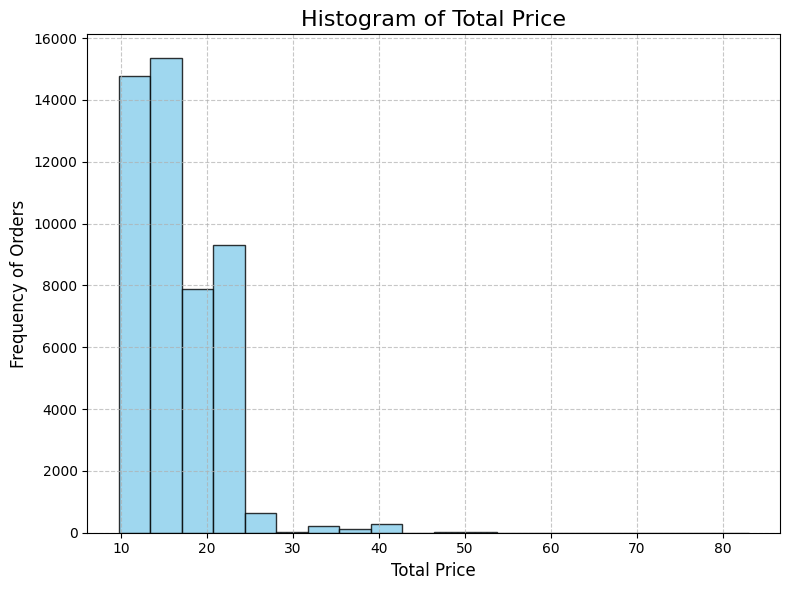

In [25]:
#Histogram for 'Sales'
plt.figure(figsize=(8, 6))
plt.hist(df['total_price'], bins=20, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Histogram of Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Frequency of Orders', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

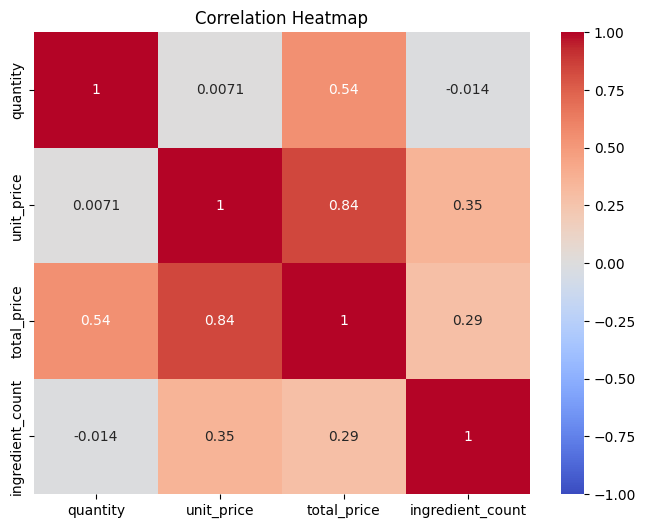

In [26]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['quantity', 'unit_price', 'total_price','ingredient_count']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Replace pizza_size with numeric values for regression
df['pizza_size'] = df['pizza_size'].replace({'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5})

# Independent variable: pizza_size, Dependent variable: total_price
X = df[['pizza_size']]
y = df['total_price']

# Add a constant for statsmodels regression
X_sm = sm.add_constant(X)

# 1. Statsmodels OLS regression
model_sm = sm.OLS(y, X_sm).fit()
print("Statsmodels OLS Regression Summary:\n", model_sm.summary())

# 2. Sklearn Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_sklearn = LinearRegression().fit(X_train, y_train)

# Predict on test set and calculate MSE
y_pred_sklearn = model_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"Mean Squared Error (sklearn): {mse_sklearn:.2f}")

# Generate predictions for visualization
y_pred_sm = model_sm.predict(X_sm)
y_pred_sklearn_full = model_sklearn.predict(X)

# Statsmodels R-squared
r2_sm = model_sm.rsquared
print(f"R-squared (Statsmodels): {r2_sm:.2f}")

# Sklearn R-squared
r2_sklearn = model_sklearn.score(X_test, y_test)
print(f"R-squared (Sklearn): {r2_sklearn:.2f}")

Statsmodels OLS Regression Summary:
                             OLS Regression Results                            
Dep. Variable:            total_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                 5.977e+04
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:18:26   Log-Likelihood:            -1.2194e+05
No. Observations:               48620   AIC:                         2.439e+05
Df Residuals:                   48618   BIC:                         2.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

C:\Users\Angel\AppData\Local\Temp\ipykernel_14792\933500367.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pizza_size'] = df['pizza_size'].replace({'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5})


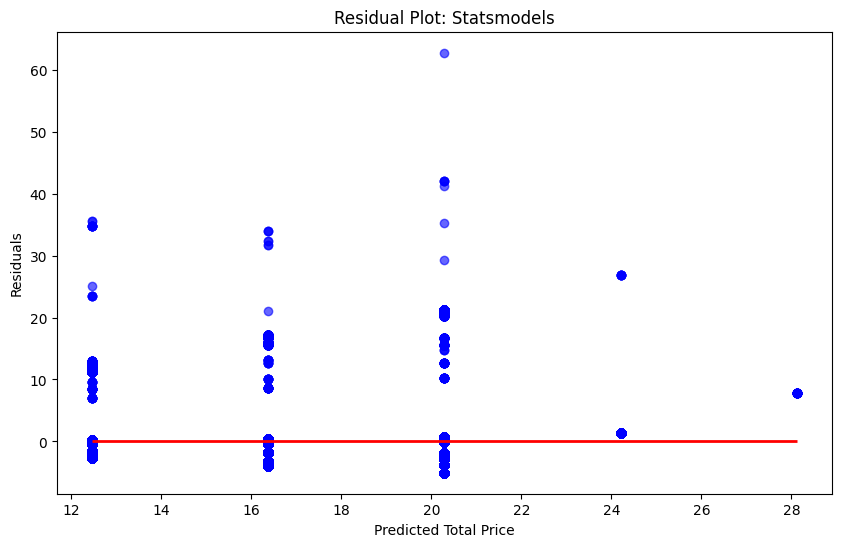

In [28]:
# Residual plot for Statsmodels
residuals = model_sm.resid
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sm, residuals, color='blue', alpha=0.6)
plt.hlines(y=0, xmin=y_pred_sm.min(), xmax=y_pred_sm.max(), colors='red', lw=2)
plt.xlabel('Predicted Total Price')
plt.ylabel('Residuals')
plt.title('Residual Plot: Statsmodels')
plt.show()

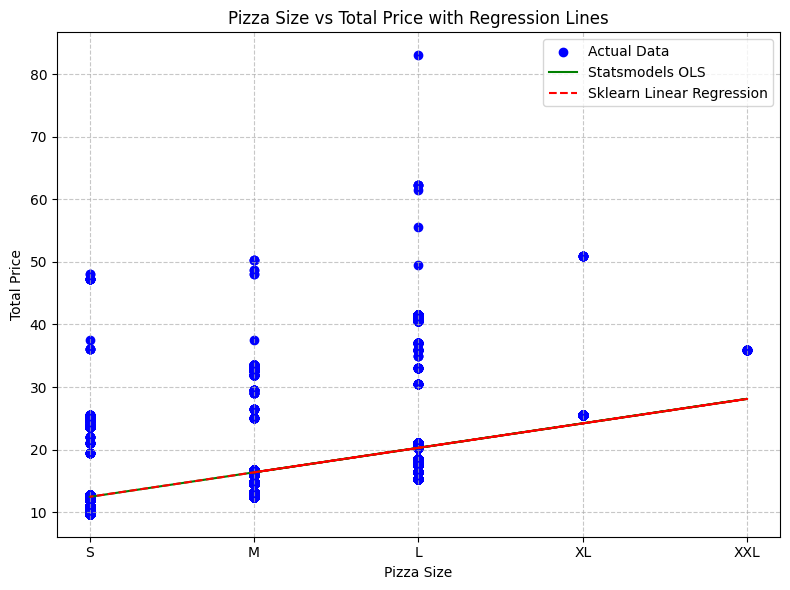

In [29]:
# Map numeric values back to categories for visualization
size_mapping = {1: 'S', 2: 'M', 3: 'L', 4: 'XL', 5: 'XXL'}
df['pizza_size_category'] = df['pizza_size'].map(size_mapping)

# 3. Scatter plot with regression lines
plt.figure(figsize=(8, 6))
plt.scatter(df['pizza_size'], df['total_price'], color='blue', label='Actual Data')
plt.plot(df['pizza_size'], y_pred_sm, color='green', label='Statsmodels OLS')
plt.plot(df['pizza_size'], y_pred_sklearn_full, color='red', linestyle='--', label='Sklearn Linear Regression')
plt.xlabel("Pizza Size")
plt.xticks(ticks=range(1, 6), labels=['S', 'M', 'L', 'XL', 'XXL'])
plt.ylabel("Total Price")
plt.title("Pizza Size vs Total Price with Regression Lines")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

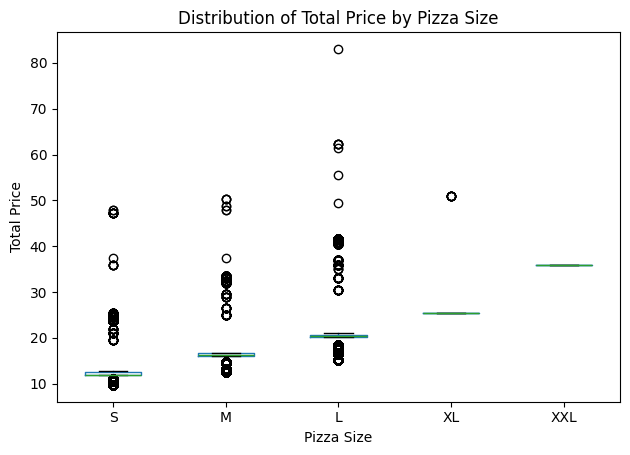

In [30]:
# 4. Boxplot: Distribution of Total Price by Pizza Size
plt.figure(figsize=(8, 6))
df.boxplot(column='total_price', by='pizza_size', grid=False)
plt.xlabel("Pizza Size")
plt.xticks(ticks=range(1, 6), labels=['S', 'M', 'L', 'XL', 'XXL'])
plt.ylabel("Total Price")
plt.title("Distribution of Total Price by Pizza Size")
plt.suptitle("")  # Remove automatic title
plt.tight_layout()
plt.show()